<a href="https://colab.research.google.com/github/RosaR02/Car-and-Adult-Income/blob/main/Adult_Income_Dataset%20PART%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Adult Income Dataset

1. Source of data- Kaggle

2. Brief description of data- The data describes the features related to adult incomes.

3. What is the target? Income

4. What does one row represent? (A person? A business? An event? A product?) A person

5. Is this a classification or regression problem? A Regression

6. How many features does the data have? 19

7. How many rows are in the dataset? 1000

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset? I don't see any at the moment.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split


In [66]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes

In [67]:
df = pd.read_csv("/content/archive.zip")
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [69]:
# Check for duplicates
df.duplicated().sum()

52

In [70]:
## Drop duplicate rows
df.drop_duplicates(inplace=True)


In [71]:
#double checking
df.duplicated().sum()

0

In [72]:
df.drop(columns=["fnlwgt"], inplace=True) # Dropping these columns in this line of code because they have no analytical value
df.drop(columns=["educational-num"], inplace=True)
df.drop(columns=["capital-gain"], inplace=True)
df.drop(columns=["capital-loss"], inplace=True)
df.drop(columns=["relationship"], inplace=True)
df.head(10)

,age,workclass,education,marital-status,occupation,race,gender,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,White,Male,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Black,Male,40,United-States,>50K
4,18,?,Some-college,Never-married,?,White,Female,30,United-States,<=50K
5,34,Private,10th,Never-married,Other-service,White,Male,30,United-States,<=50K
6,29,?,HS-grad,Never-married,?,Black,Male,40,United-States,<=50K
7,63,Self-emp-not-inc,Prof-school,Married-civ-spouse,Prof-specialty,White,Male,32,United-States,>50K
8,24,Private,Some-college,Never-married,Other-service,White,Female,40,United-States,<=50K
9,55,Private,7th-8th,Married-civ-spouse,Craft-repair,White,Male,10,United-States,<=50K


##Identify and address missing values

In [73]:
df.isna().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
race              0
gender            0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48790 non-null  int64 
 1   workclass       48790 non-null  object
 2   education       48790 non-null  object
 3   marital-status  48790 non-null  object
 4   occupation      48790 non-null  object
 5   race            48790 non-null  object
 6   gender          48790 non-null  object
 7   hours-per-week  48790 non-null  int64 
 8   native-country  48790 non-null  object
 9   income          48790 non-null  object
dtypes: int64(2), object(8)
memory usage: 4.1+ MB


In [75]:
df['race'].value_counts()

White                 41714
Black                  4683
Asian-Pac-Islander     1517
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [76]:
df['education'].value_counts()

HS-grad         15770
Some-college    10863
Bachelors        8013
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              655
Doctorate         594
5th-6th           507
1st-4th           245
Preschool          81
Name: education, dtype: int64

In [77]:
df["education"] = df["education"].replace("9th","HS")
df["education"] = df["education"].replace("10th","HS")
df["education"] = df["education"].replace("11th","HS")
df["education"] = df["education"].replace("12th","HS")
df["education"] = df["education"].replace("1st-4th","ELEM")
df["education"] = df["education"].replace("5th-6th","ELEM")
df["education"] = df["education"].replace("7th-8th","MIDDLE")

In [78]:
df['education'].value_counts()

HS-grad         15770
Some-college    10863
Bachelors        8013
HS               4612
Masters          2656
Assoc-voc        2060
Assoc-acdm       1601
MIDDLE            954
Prof-school       834
ELEM              752
Doctorate         594
Preschool          81
Name: education, dtype: int64

In [79]:
df['occupation'].value_counts()

Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
?                    2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

In [80]:
df["occupation"] = df["occupation"].replace("?","Other")
df["occupation"].value_counts()

Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
Other                2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: occupation, dtype: int64

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48790 non-null  int64 
 1   workclass       48790 non-null  object
 2   education       48790 non-null  object
 3   marital-status  48790 non-null  object
 4   occupation      48790 non-null  object
 5   race            48790 non-null  object
 6   gender          48790 non-null  object
 7   hours-per-week  48790 non-null  int64 
 8   native-country  48790 non-null  object
 9   income          48790 non-null  object
dtypes: int64(2), object(8)
memory usage: 4.1+ MB


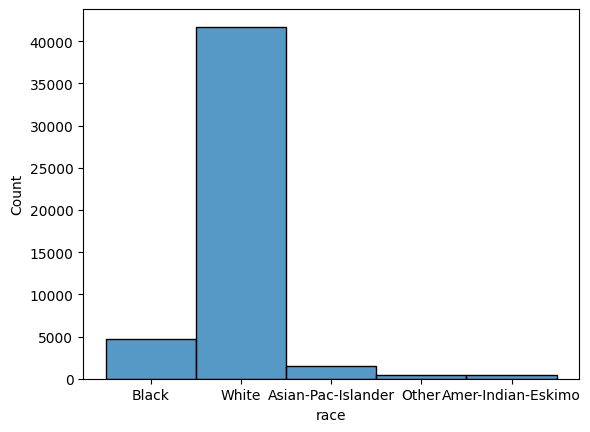

In [82]:
sns.histplot(x="race", data=df); # This line of code provides a univariate visual for this value

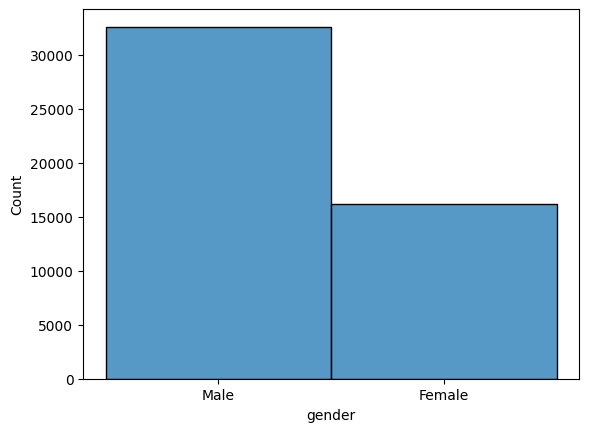

In [83]:
sns.histplot(x="gender", data=df); # This line of code provides a univariate visual for this value

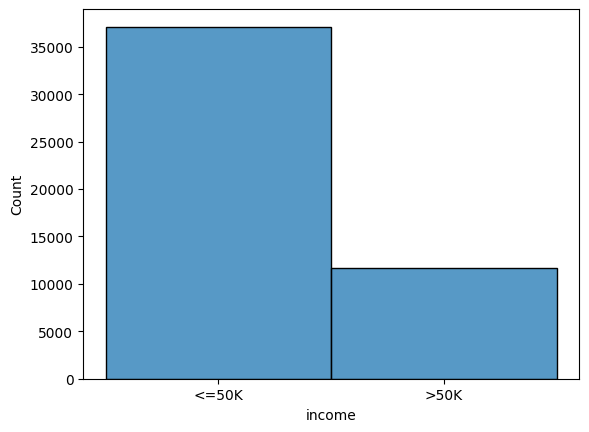

In [84]:
sns.histplot(x="income", data=df); # This line of code provides a univariate visual for this value